# **01. MobileNet Demystified: A Beginner’s Guide**

<span style="font-size:19px; color: #fdb6bd;"><strong>What is MobileNet, and how does it contribute to efficient mobile vision applications?</strong></span>

> <p style="font-size: 18px;">
>     <span style="color: #293187;">
>  MobileNet is a simple but efficient and not very computationally intensive convolutional neural networks for mobile vision applications. MobileNet is widely used in many real-world applications which includes object detection, fine-grained classifications, face attributes, and localization. In this lecture, I will explain you the overview of MobileNet and how exactly it becomes the most efficient and lightweight neural network.
>     </span>
> </p>


<a href="https://ibb.co/KVKGp1j"><img src="https://i.ibb.co/zP65Tkh/mobilenet.png" alt="mobilenet" border="0"></a>

<span style="font-size:19px; color: #293187;"><strong>Index:</strong></span>

 <span style="font-size:17px; color: #fdb6bd;"><strong>1. Depth-wise Separable Convolution:</strong></span>

>   - 1.1 Depth-wise Convolution
>   - 1.2 Point-wise Convolution
  
 <span style="font-size:17px; color: #fdb6bd;"><strong>2. The Entire Network Structure</strong></span>

<span style="font-size:17px; color: #fdb6bd;"><strong>3. Parameters of MobileNet:</strong></span>

>   - 3.1 Width-wise Multiplier
>   - 3.2 Resolution-wise Multiplier
> 

<span style="font-size:18px; color: #fdb6bd;"><strong>1. Depth-wise Separable Convolution:</strong></span>


> <p style="font-size: 17px;">
>     <span style="color: #8fbbc6;">
>  The Depth-wise separable convolution is comprising of two layers, the depth-wise convolution, and the point-wise convolution. Basically the first layer is used to filter the input channels and the second layer is used to combine them to create a new feature.
>     </span>
> </p>

<span style="font-size:18px; color: #fdb6bd;"><strong>1.1 Depth-wise convolution:</strong></span>


> <p style="font-size: 17px;">
>     <span style="color: #8fbbc6;">
>The depth-wise convolutions are used to apply a single filter into each input channel. This is different from a standard convolution in which the filters are applied to all of the input channels.
>     </span>
> </p>

<span style="font-size:18px; color: #fdb6bd;"><strong>1.2 Point-wise Convolution:</strong></span>


> <p style="font-size: 17px;">
>     <span style="color: #8fbbc6;">
>Since the depthwise convolution is only used to filter the input channel, it does not combine them to produce new features. So an additional layer called pointwise convolution layer is made, which computes a linear combination of the output of depthwise convolution using a 1 × 1 convolution.
>     </span>
> </p>

<a href="https://ibb.co/6H3qtDw"><img src="https://i.ibb.co/LxLsg9R/Difference-between-regular-depthwise-and-pointwise-convolution.png" alt="Difference-between-regular-depthwise-and-pointwise-convolution" border="0"></a>

<span style="font-size:18px; color: #fdb6bd;"><strong>The entire Network Structure:</strong></span>


> <a href="https://imgbb.com/"><img src="https://i.ibb.co/1b8Q4cQ/1-m0-T4-Nhg-RHG0x-K6-j-BZkqfg.webp" alt="1-m0-T4-Nhg-RHG0x-K6-j-BZkqfg" border="0"></a>


 <p style="font-size: 17px;">
     <span style="color: #8fbbc6;">
From the above image, we can see that every convolution layer followed by a batch normalization and a ReLU. Also, a final average pooling is been introduced just before the fully connected layer to reduce the spatial dimension to 1.
Note that the above architecture has 28 layers by counting widthwise and pointwise convolution as separate layers.
     </span>
 </p>

# **02. Import Libraries**

In [1]:
import os
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='librosa')

import numpy as np
import seaborn as sns
import librosa
import shutil
from io import BytesIO
from PIL import Image, ImageOps, ImageFile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam

# Handle truncated image warnings in PIL
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Suppress TensorFlow logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


2024-08-09 01:14:13.142546: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 01:14:13.142643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 01:14:13.260504: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **03. Data Preparation**

In [2]:
data_path = '/kaggle/input/arabic-alphabets-sign-language-dataset-arasl/ArASL_Database_54K_Final/ArASL_Database_54K_Final'
data = []  
labels = []  
categories = os.listdir(data_path) # List of categories in this dataset

max_images_per_class = 400 

for category in categories:
    category_path = os.path.join(data_path, category) # Full path to the category directory
    images_loaded = 0 
    # Loop over each image in the category
    for img_name in os.listdir(category_path):
        if images_loaded >= max_images_per_class:
            break  # Stop loading more images if the limit is reached
        
        img_path = os.path.join(category_path, img_name) # Full path to the image file
        img = load_img(img_path, target_size=(224, 224))  # Load and resize the image
        img_array = img_to_array(img) # Convert image to a NumPy array
        img_array /= 255.0  # Normalize pixel values to [0,1]
        data.append(img_array)  # Add image array to the data list
        # Add category (label) to the labels list
        labels.append(category)
        
        images_loaded += 1  # Increment the counter

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)


# **04. Splitting Dataset**

In [3]:

X_train, X_test, y_train, y_test = train_test_split(data, categorical_labels, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5, random_state=42)
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)
print(f'X_train shape is {X_train.shape}')
print(f'X_val shape is {X_val.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_val shape is {y_val.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (10240, 224, 224, 3)
X_val shape is (1280, 224, 224, 3)
X_test shape is (1280, 224, 224, 3)
y_train shape is (10240, 32)
y_val shape is (1280, 32)
y_test shape is (1280, 32)


# **05. Building a Model**

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

base_model = MobileNet(weights='/kaggle/input/the-mobilenet-weights/tensorflow2/default/1/mobilenet_1_0_224_tf_no_top.h5', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the MobileNet base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
num_classes = 32  # Replace with your number of classes
predictions = Dense(num_classes, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,896,288 (14.86 MB)

 Trainable params: 665,888 (2.54 MB)

 Non-trainable params: 3,230,400 (12.32 MB)

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

input_shape = (224, 224, 1)
num_classes = 32

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# **06. Training the Model**

In [6]:
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
  6/320 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 8.6806e-04 - loss: 5.0138

I0000 00:00:1723166154.900615      66 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


320/320 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4148 - loss: 2.2455 - val_accuracy: 0.8852 - val_loss: 0.3886
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8151 - loss: 0.5756 - val_accuracy: 0.9242 - val_loss: 0.2505
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8805 - loss: 0.3665 - val_accuracy: 0.9336 - val_loss: 0.2412
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9042 - loss: 0.2914 - val_accuracy: 0.9430 - val_loss: 0.1953
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9199 - loss: 0.2456 - val_accuracy: 0.9281 - val_loss: 0.2497
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9359 - loss: 0.2058 - val_accuracy: 0.9492 - val_loss: 0.1800
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9285 - loss: 0.2065 - val_accuracy: 0.9531 - val_loss: 0.1776
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9406 - loss: 0.1789 - val_accurac

# **07. Model Evaluation**

In [7]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9627 - loss: 0.1266
Test Accuracy: 95.86%


<h3 style="font-size: 16px;">7.1. Training and Validation Loss</h3>


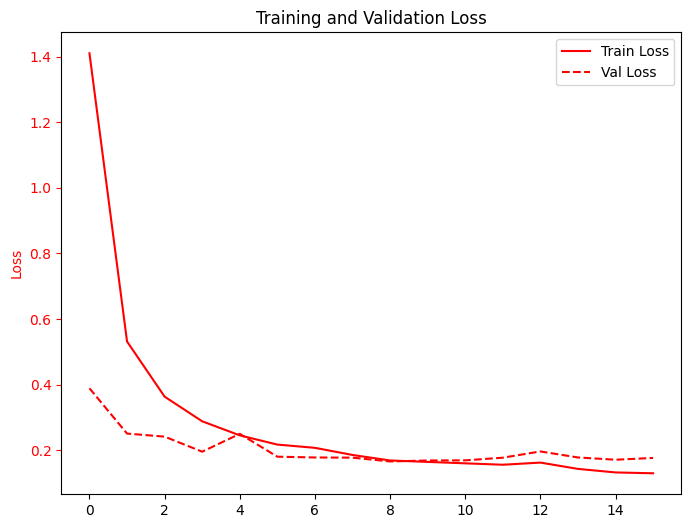

In [8]:
fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.plot(history.history['loss'], 'r-', label='Train Loss')
ax2.plot(history.history['val_loss'], 'r--', label='Val Loss')
ax2.set_ylabel('Loss', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper right')

plt.title('Training and Validation Loss')
plt.show()

<h3 style="font-size: 16px;">7.2. Training and Validation Accuracy</h3>


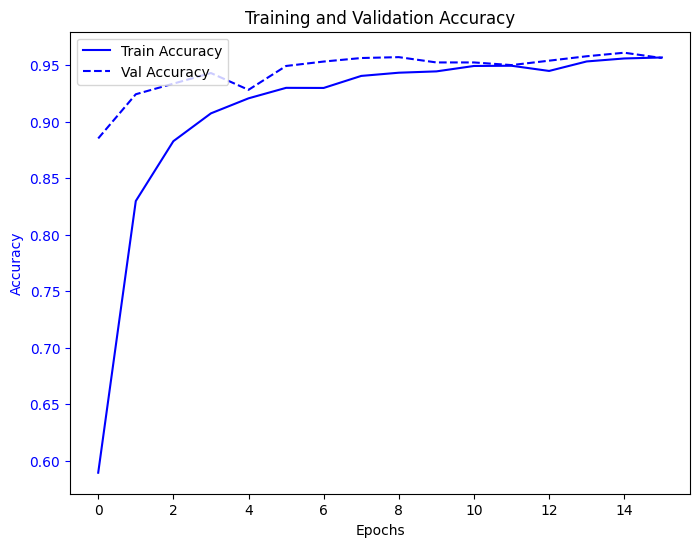

In [9]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot accuracy
ax1.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], 'b--', label='Val Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', colors='b')
plt.title('Training and Validation Accuracy')
ax1.legend(loc='upper left')

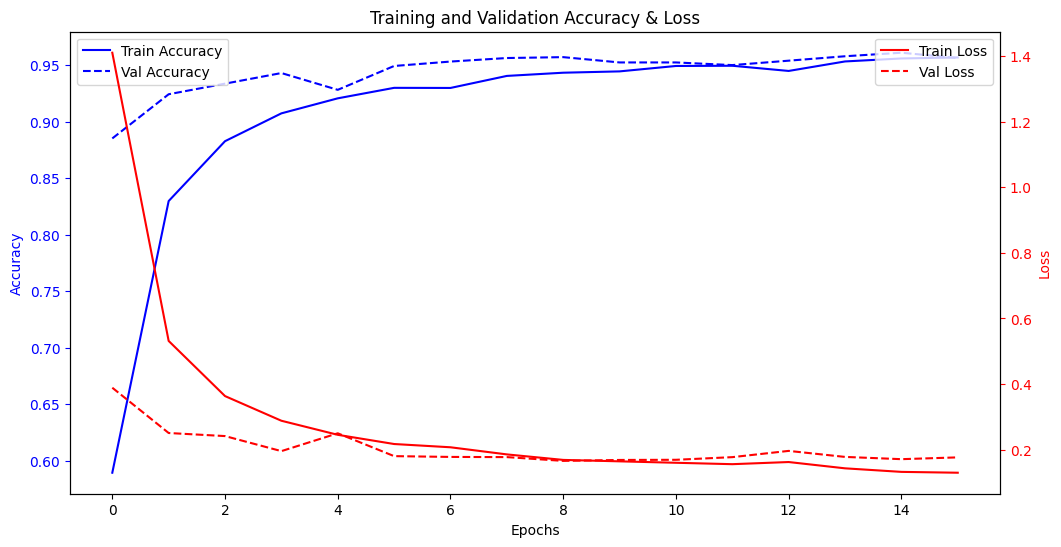

In [10]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot accuracy
ax1.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], 'b--', label='Val Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper left')

# Create a second y-axis for loss
ax2 = ax1.twinx()
ax2.plot(history.history['loss'], 'r-', label='Train Loss')
ax2.plot(history.history['val_loss'], 'r--', label='Val Loss')
ax2.set_ylabel('Loss', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper right')

plt.title('Training and Validation Accuracy & Loss')
plt.show()


<h3 style="font-size: 16px;">7.3. Confusion Matrix</h3>


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


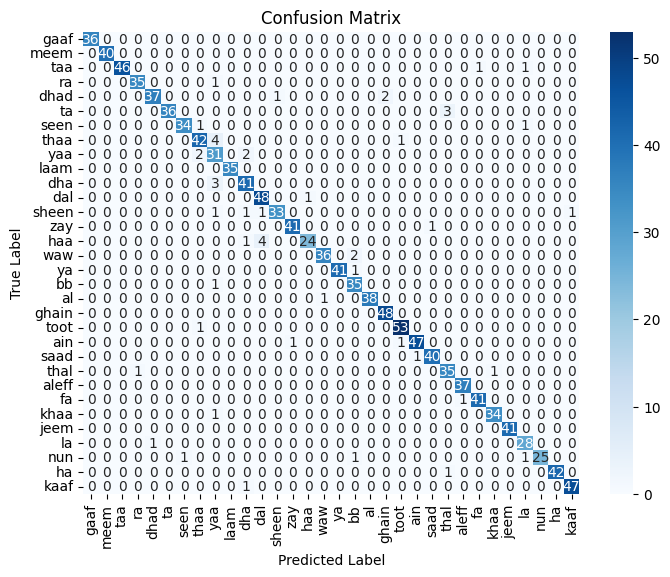

In [11]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



<h3 style="font-size: 16px;">7.4. Classification Report</h3>

In [12]:
print('\nClassification Report:')
print(classification_report(y_true_classes, y_pred_classes, target_names=categories))


Classification Report:
              precision    recall  f1-score   support

        gaaf       1.00      1.00      1.00        36
        meem       1.00      1.00      1.00        40
         taa       1.00      0.96      0.98        48
          ra       0.97      0.97      0.97        36
        dhad       0.97      0.93      0.95        40
          ta       1.00      0.92      0.96        39
        seen       0.97      0.94      0.96        36
        thaa       0.91      0.89      0.90        47
         yaa       0.74      0.89      0.81        35
        laam       1.00      1.00      1.00        35
         dha       0.89      0.93      0.91        44
         dal       0.91      0.98      0.94        49
       sheen       0.97      0.89      0.93        37
         zay       0.98      0.98      0.98        42
         haa       0.96      0.83      0.89        29
         waw       0.97      0.95      0.96        38
          ya       1.00      0.98      0.99        42
   

# **08. Test the Model**

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


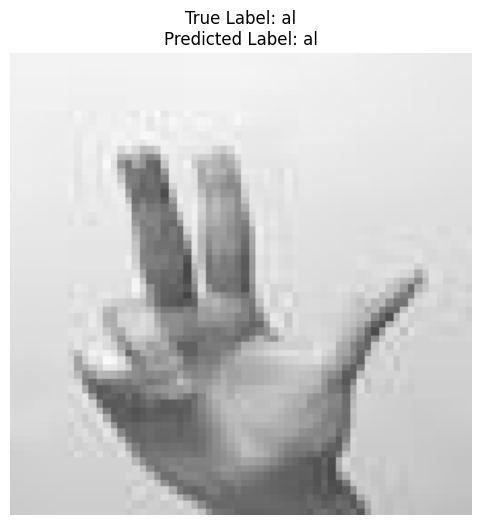

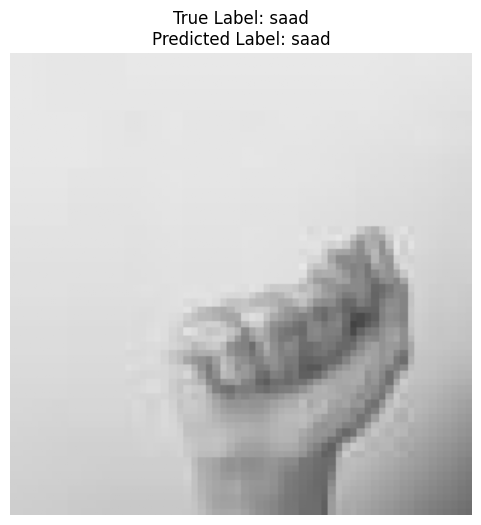

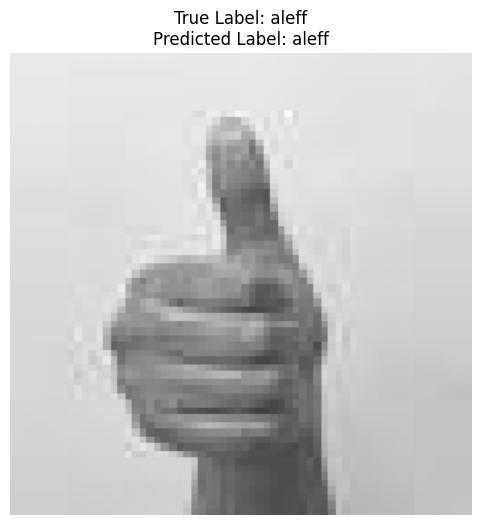

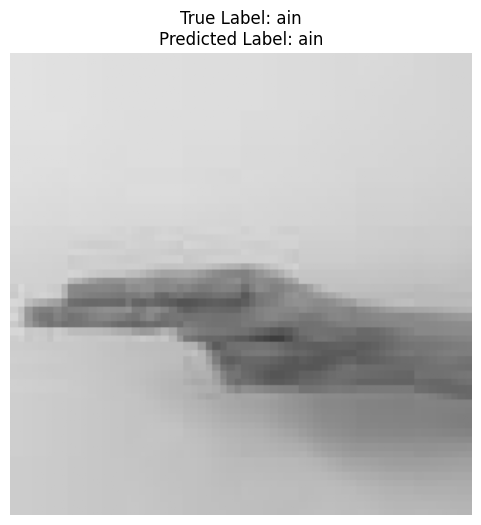

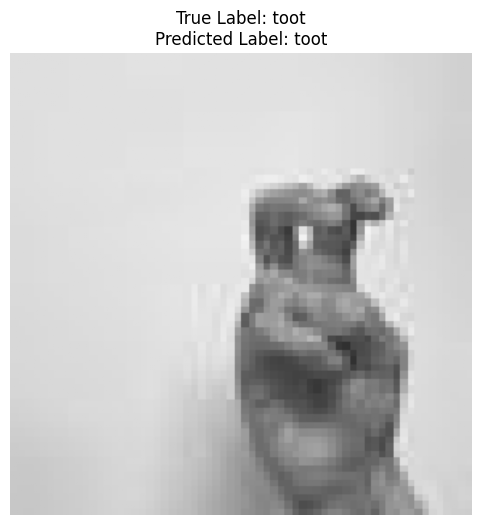

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Function to plot image with title
def plot_image(img_array, true_label, pred_label):
    plt.figure(figsize=(6, 6))
    plt.imshow(img_array)
    plt.title(f"True Label: {true_label}\nPredicted Label: {pred_label}")
    plt.axis('off')
    plt.show()

# Plot a few test images with actual and predicted class names
num_images_to_plot = 5 
for i in range(num_images_to_plot):
    # Get the image and its true label
    img = X_test[i]
    true_label = label_encoder.inverse_transform([y_true_classes[i]])[0]
    # Get the predicted label
    pred_label = label_encoder.inverse_transform([y_pred_classes[i]])[0]
    
    # Plot the image with title showing true and predicted labels
    plot_image(img, true_label, pred_label)



<h3 style="font-size: 16px;">8.1. Test the model in different dataset </h3>

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Define class labels for Arabic Sign Language
class_labels = [
    'ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 
    'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 
    'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 
    'ya', 'yaa', 'zay'
]

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(224, 224))  # Load image as grayscale
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.repeat(img_array, 3, axis=-1)  # Convert grayscale to RGB by duplicating channels
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1] range
    return img_array

# Predict on a new image
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Get the index of the highest probability
    confidence = np.max(predictions[0])  # Get the highest probability
    return class_labels[predicted_class], confidence

# Example usage
img_path = '/kaggle/input/rgb-arabic-alphabets-sign-language-dataset/RGB ArSL dataset/Waw/Waw_103.jpg'
predicted_label, confidence = predict_image(img_path)
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Label: waw
Confidence: 0.9999


# **09. Model Save Operation (H5 Format)**

In [15]:
# Save the trained model to an H5 file
model_save_path = '/kaggle/working/arabic_sign_language_model.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /kaggle/working/arabic_sign_language_model.h5
